<a href="https://colab.research.google.com/github/shreshyy/Simple-Vector-Regression/blob/main/Simple_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:, -1].values

In [71]:
print(x)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [72]:
y = y.reshape(len(y),1)

In [73]:
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
scy = StandardScaler()
x = scx.fit_transform(x)
y = scy.fit_transform(y)

In [74]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [75]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [76]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(x, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [77]:
scy.inverse_transform(reg.predict(scx.transform([[6.5]])))

array([170370.0204065])

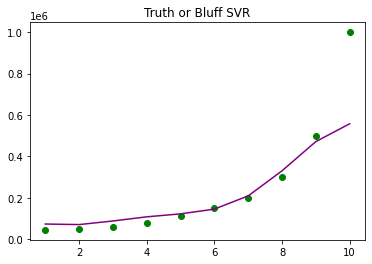

In [81]:
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color='green')
plt.plot(scx.inverse_transform(x),scy.inverse_transform(reg.predict(x)),color='purple')
plt.title('Truth or Bluff SVR')
plt.show()

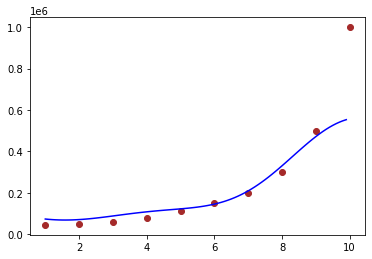

In [88]:
xgrid = np.arange(min(scx.inverse_transform(x)),max(scx.inverse_transform(x)),0.1)
xgrid = xgrid.reshape(len(xgrid),1)
plt.scatter(scx.inverse_transform(x),scy.inverse_transform(y),color='brown')
plt.plot(xgrid,scy.inverse_transform(reg.predict(scx.transform(xgrid))),color='blue')
plt.show()